In [1]:

import tensorflow as tf
import numpy as np
import os
from tensorflow.keras import layers, models
from sklearn.metrics import precision_score, recall_score, accuracy_score
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
image_size = (224, 224)
batch_size = 32

In [11]:

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "BT100/Training",
    image_size=image_size,
    batch_size=batch_size,
    label_mode="int",
    shuffle=True
)

Found 2858 files belonging to 4 classes.


In [12]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "BT100/Testing",
    image_size=image_size,
    batch_size=batch_size,
    label_mode="int",
    shuffle=False
)

Found 656 files belonging to 4 classes.


In [18]:
#Pre-trained model
from tensorflow.keras.applications import EfficientNetB0

In [22]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False


pre_Trained_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

In [23]:

pre_Trained_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = pre_Trained_model.fit(train_data, epochs=30, validation_data=test_data)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 52s 303ms/step - accuracy: 0.6848 - loss: 0.7400 - val_accuracy: 0.8445 - val_loss: 0.3769
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8617 - loss: 0.3552 - val_accuracy: 0.8598 - val_loss: 0.3239
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.8807 - loss: 0.2961 - val_accuracy: 0.8780 - val_loss: 0.2811
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.9054 - loss: 0.2522 - val_accuracy: 0.8918 - val_loss: 0.2785
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9126 - loss: 0.2454 - val_accuracy: 0.8918 - val_loss: 0.2504
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.9208 - loss: 0.2075 - val_accuracy: 0.8902 - val_loss: 0.2401
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9378 - loss: 0.1855 - val_accuracy: 0.8994 - val_loss: 0.2451
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.9399 - loss: 0.1719 - val_accuracy: 0.9116 

In [25]:
from sklearn.metrics import classification_report

y_pred = pre_Trained_model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
true_labels = np.concatenate([y.numpy() for x, y in test_data], axis=0)
print(classification_report(true_labels, y_pred_classes))

21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 371ms/step
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       150
           1       0.87      0.84      0.86       153
           2       0.95      0.99      0.97       203
           3       0.94      0.99      0.97       150

    accuracy                           0.93       656
   macro avg       0.93      0.93      0.93       656
weighted avg       0.93      0.93      0.93       656



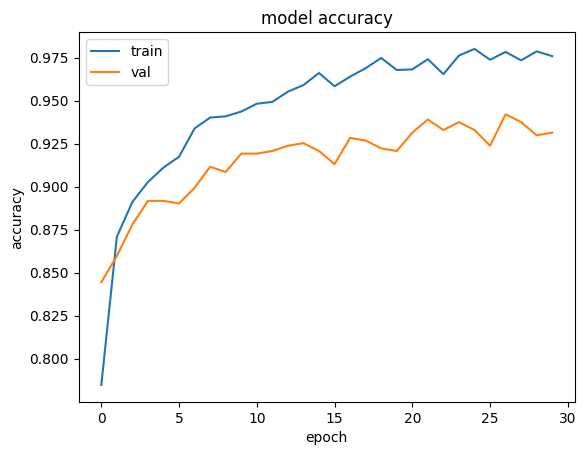

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

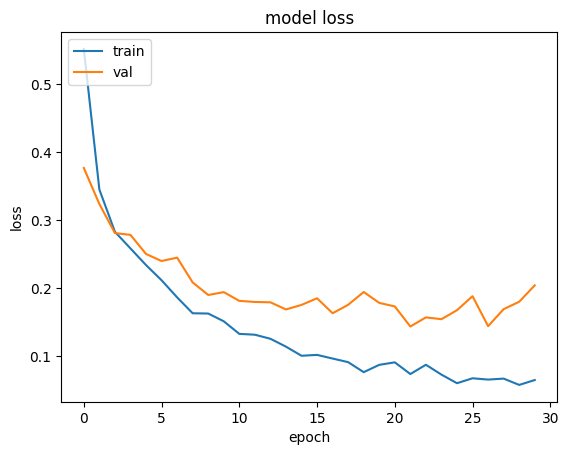

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')